# This case requires trainees to develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan.

# load libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# load data

In [4]:
df = pd.read_csv('Fraud.csv')


# eda and data cleaning

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [7]:
df.shape

(6362620, 11)

In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [25]:
df.info() #know dataType

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6354407 entries, 0 to 6362323
Data columns (total 11 columns):
 #   Column          Dtype         
---  ------          -----         
 0   step            int64         
 1   type            object        
 2   amount          float64       
 3   nameOrig        object        
 4   oldbalanceOrg   float64       
 5   newbalanceOrig  float64       
 6   nameDest        object        
 7   oldbalanceDest  float64       
 8   newbalanceDest  float64       
 9   isFraud         datetime64[ns]
 10  isFlaggedFraud  int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 581.8+ MB


# Check for missing values in the DataFrame

In [11]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [16]:
df.dropna(inplace=True)


# Identify outliers using z-score

In [19]:
z_scores = stats.zscore(df['isFraud'])
threshold = 3
outliers = np.abs(z_scores) > threshold

In [20]:
df = df[~outliers]

# Handling Multi-collinearity

In [21]:
correlation_matrix = df.corr()


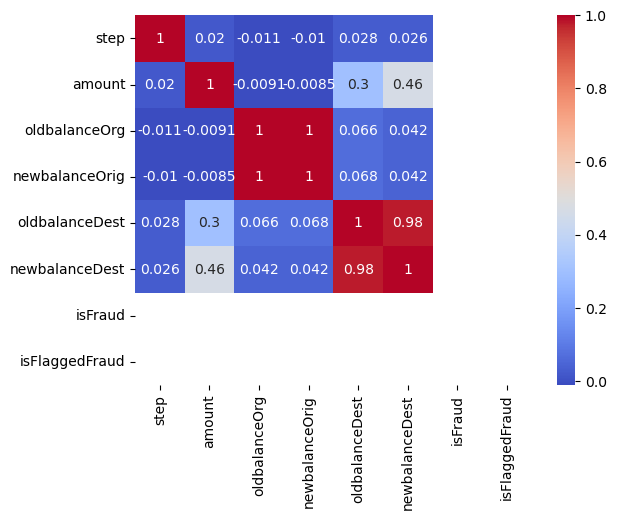

In [22]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [23]:
df['isFraud'] = pd.to_datetime(df['isFraud'])

C:\Users\HP\AppData\Local\Temp\ipykernel_13340\1951371207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isFraud'] = pd.to_datetime(df['isFraud'])


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6354407 entries, 0 to 6362323
Data columns (total 11 columns):
 #   Column          Dtype         
---  ------          -----         
 0   step            int64         
 1   type            object        
 2   amount          float64       
 3   nameOrig        object        
 4   oldbalanceOrg   float64       
 5   newbalanceOrig  float64       
 6   nameDest        object        
 7   oldbalanceDest  float64       
 8   newbalanceDest  float64       
 9   isFraud         datetime64[ns]
 10  isFlaggedFraud  int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 581.8+ MB


In [27]:
df.describe(include = 'object')

,type,nameOrig,nameDest
count,6354407,6354407,6354407
unique,5,6345122,2719685
top,CASH_OUT,C1902386530,C1286084959
freq,2233384,3,113


In [28]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

type
['PAYMENT' 'DEBIT' 'CASH_OUT' 'TRANSFER' 'CASH_IN']
--------------------------------------------------
nameOrig
['C1231006815' 'C1666544295' 'C2048537720' ... 'C102120699' 'C614459560'
 'C49652609']
--------------------------------------------------
nameDest
['M1979787155' 'M2044282225' 'M1230701703' ... 'M747723689' 'C1818183087'
 'C855350324']
--------------------------------------------------


In [29]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [30]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6354407.0
mean,2.432357e+02,1.781970e+05,8.328287e+05,8.559702e+05,1.101421e+06,1.224926e+06,0.0
std,1.421402e+02,5.962370e+05,2.887144e+06,2.924987e+06,3.399202e+06,3.673816e+06,0.0
min,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.560000e+02,1.336840e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.390000e+02,7.468472e+04,1.406900e+04,0.000000e+00,1.333118e+05,2.148817e+05,0.0
75%,3.340000e+02,2.083648e+05,1.069695e+05,1.447307e+05,9.441446e+05,1.111975e+06,0.0
max,7.180000e+02,9.244552e+07,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,0.0


In [ ]:
# Calculate the counts of occurrences for each value in 'oldbalanceOrg'
oldbalance_counts = df['oldbalanceOrg'].value_counts()

# Plot the bar graph
plt.figure(figsize=(5, 4))
plt.title('Counts of "oldbalanceOrg"')
plt.bar(oldbalance_counts.index, oldbalance_counts.values, edgecolor='k', width=0.7)
plt.xlabel('Old Balance')
plt.ylabel('Count')
plt.show()
